In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data1=np.genfromtxt("data1.csv",delimiter=',')

#Waypoint Targets
wplats=[40.267110,40.267492,40.266725,40.267993]
wplongs=[-111.634983,-111.635755,-111.635809,-111.634930]

#Extract Data
time=data1[1:,0]
lats=data1[1:,6]
logs=data1[1:,7]
alti=data1[1:,8]
speed=data1[1:,9]
groundcourse=data1[1:,10]

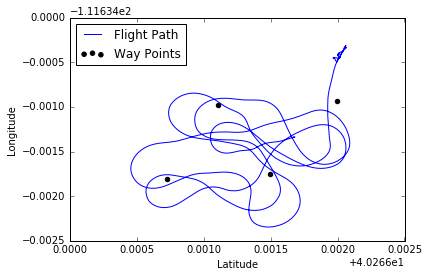

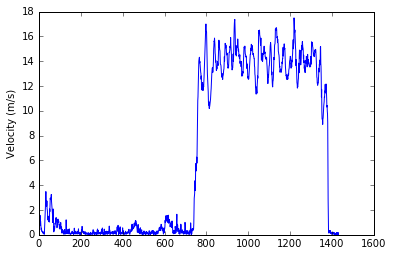

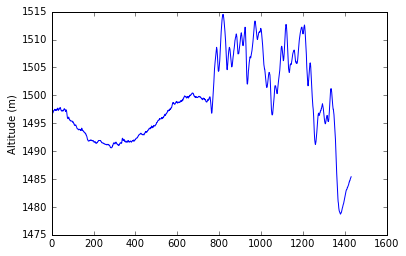

In [92]:
plt.figure()
#Plot Data
plt.plot(lats,logs,label="Flight Path")
#Plot Way Points
plt.scatter(wplats,wplongs,color="k",label="Way Points")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc="upper left")
plt.figure()
plt.plot(speed)
plt.ylabel('Velocity (m/s)')
plt.figure()
plt.plot(alti)
plt.ylabel('Altitude (m)')

Lets trim our the initail data points as the plane was not flying.

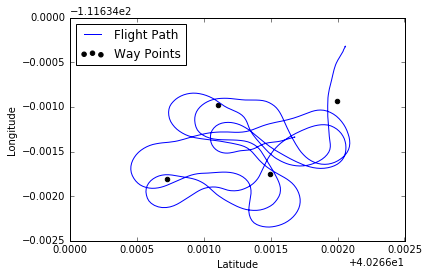

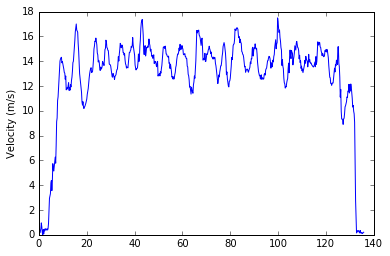

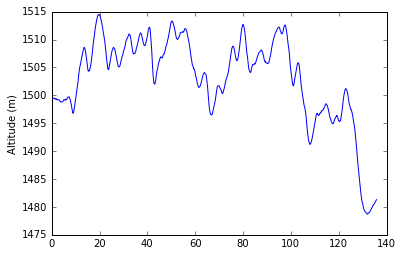

In [93]:
lstart = 720
lend = 1400
tstart=time[lstart]
tref=(time-tstart)*10**(-9)
plt.figure()
#Plot Data
plt.plot(lats[lstart:lend],logs[lstart:lend],label="Flight Path")
#Plot Way Points
plt.scatter(wplats,wplongs,color="k",label="Way Points")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc="upper left")
plt.figure()
plt.plot(tref[lstart:lend],speed[lstart:lend])
plt.ylabel('Velocity (m/s)')
plt.figure()
plt.plot(tref[lstart:lend],alti[lstart:lend])
plt.ylabel('Altitude (m)')

From this data, it looks like we hit all the way points. It also looks like our average flight velocity is about 14 m/s. The altitude data looks a bit questionable as the plane regains altitude after loosing all its velocity. Let's look at the launch sequence and see at what speed we started to fly.

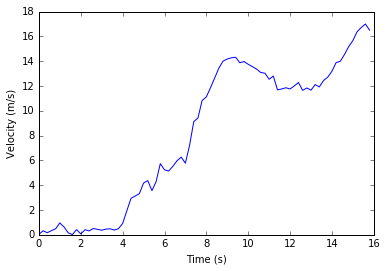

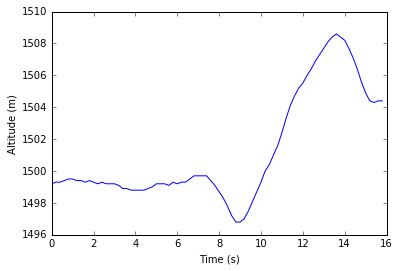

In [94]:
lstart = 720
lend = 800
tstart=time[lstart]
tref=(time-tstart)*10**(-9)
plt.figure()
plt.plot(tref[lstart:lend],speed[lstart:lend])
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.figure()
plt.plot(tref[lstart:lend],alti[lstart:lend])
plt.ylabel('Altitude (m)')
plt.xlabel('Time (s)')

It looks like the plan was thrown at around the 7s mark. Then the plane acclereated while falling for 2 seconds until at 9 seconds it starts gaining altitude. What is interesting that is after the inital recovery from falling, we still gained altitude while slowing down. I believe this is because our plan weighed around 1.3 kg. The moment from the ~2 seconds of falling had to be counteraded by lift. Lets look at the first attempt at the waypoints.

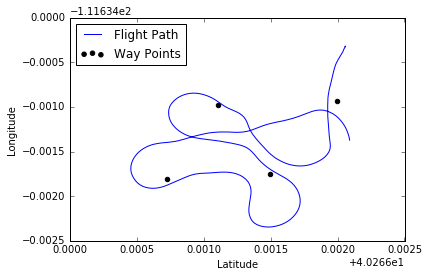

In [95]:
lstart = 720
lend = 1060
tstart=time[lstart]
tref=(time-tstart)*10**(-9)
plt.figure()
#Plot Data
plt.plot(lats[lstart:lend],logs[lstart:lend],label="Flight Path")
#Plot Way Points
plt.scatter(wplats,wplongs,color="k",label="Way Points")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc="upper left")

That looks really good. It looks like we have made all the waypoints. Let's check.

In [96]:
    #The distance function from autopilot.py "The Offical Distance Function"
    def distance(latitude,longitude, wp_lat, wp_lon):
        EARTH_RADIUS = 6371000.0
        distN = EARTH_RADIUS*(latitude - wp_lat)*np.pi/180.0
        distE = EARTH_RADIUS*np.cos(wp_lat*np.pi/180.0)*(longitude - wp_lon)*np.pi/180.0
        return np.linalg.norm(np.array([distN, distE]))
    wp=0
    dl=40
    for i in range(0,len(time)):
        dist=distance(lats[i],logs[i],wplats[wp],wplongs[wp])
        if wp==3 and dist<dl:
            dl=dist
        if dist<10:
            wp+=1
            print "Way Point ",wp," Reached"
    print "Closest Distance to Last Waypoint: ",dl

Way Point  1  Reached
Way Point  2  Reached
Way Point  3  Reached
Closest Distance to Last Waypoint:  12.3265883806


We missed the last waypoint! By 12.3 meters (or 2.3 meters for the tolerance). What is interesting that it was not waypoint 3 where we had issues with wifi connectivity.